In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from datetime import datetime
import json
import statistics
import matplotlib.pyplot as plt
from matplotlib import lines
import seaborn as sbn
import math

#----------------------------------------------------------------------
# IMPORTA OS DADOS DOS FORNOS EM UM DICT JSON
#----------------------------------------------------------------------
def Carrega_Fornos():
    url = "https://dry-plateau-13546.herokuapp.com/forno"
    response = urlopen(url)

    dict_json = json.loads(response.read())
    return pd.DataFrame(dict_json['rows'])

#----------------------------------------------------------------------
# CRIA UMA LISTA COM TODOS OS REGISTROS DE DETALHES DE TODOS OS FORNOS
#----------------------------------------------------------------------
def Obtem_Detalhes():
    lista_entradas = []
    detalhes = json_pd['detalhes']
    total = 0
    for sub_detalhes in detalhes:
        for entrada in sub_detalhes:
            dict_entradas = {}
            dict_entradas.setdefault('forno_id',entrada['forno_id'])
            dict_entradas.setdefault('id',entrada['id'])
            dict_entradas.setdefault('data',datetime.strptime(entrada['timestamp'][0:10], '%Y-%m-%d').date())
            dict_entradas.setdefault('hora',datetime.strptime(entrada['timestamp'][11:19], '%H:%M:%S').time())
            dict_entradas.setdefault('t_esteira',entrada['velocidade_esteira'])
            dict_entradas.setdefault('c_motor',entrada['corrente_motor'])
            dict_entradas.setdefault('temp_z1',entrada['temperatura_z1'])
            dict_entradas.setdefault('temp_z2',entrada['temperatura_z2'])
            dict_entradas.setdefault('temp_z3',entrada['temperatura_z3'])
            dict_entradas.setdefault('temp_z4',entrada['temperatura_z4'])
            dict_entradas.setdefault('temp_z5',entrada['temperatura_z5'])
            dict_entradas.setdefault('pid_z1',entrada['pid_z1'])
            dict_entradas.setdefault('pid_z2',entrada['pid_z2'])
            dict_entradas.setdefault('pid_z3',entrada['pid_z3'])
            dict_entradas.setdefault('pid_z4',entrada['pid_z4'])
            dict_entradas.setdefault('pid_z5',entrada['pid_z5'])
            lista_entradas.append(dict_entradas)
        total = total + len(sub_detalhes)
    return pd.DataFrame(lista_entradas)

#----------------------------------------------------------------------
# OBTEM AS ESTATISTICAS DAS VELOCIDADES DOS FORNOS
#----------------------------------------------------------------------
def Estatistica_Velocidade_fornos(num_forno=0):
    def Criar_dict(i):
        dict = {}
        dict.setdefault('forno_id',(i+1))
        dict.setdefault('t_max',forno.max())
        dict.setdefault('t_min',forno.min())
        dict.setdefault('t_media',forno.mean())
        dict.setdefault('t_dpadrao',forno.std())
        dict.setdefault('t_mediana',np.median(forno))
        dict.setdefault('t_moda',statistics.mode(forno))
        dict.setdefault('q_registros',len(forno))
        return dict

    def imprimir(dict):
        print("--------------------------------------------------")
        print("ESTATISTICA DA ESTEIRA DO FORNO No.: ",dict['forno_id'])
        print("--------------------------------------------------")
        print(f"Maior velocidade da esteira = {dict['t_max']: <5.2f}")
        print(f"Menor velocidade da esteira = {dict['t_min']: <5.2f}")
        print(f"Velocidade média            = {dict['t_media']: <8.4f}")
        print(f"desvio padrao               = {dict['t_dpadrao']: <8.4f}")
        print(f"Mediana                     = {dict['t_mediana']: <5.2f}")       
        print(f"Moda                        = {dict['t_moda']: <5.2f}")       
        print(f"Qde de registros            = {dict['q_registros']: <5}")       

    lista = []

    if num_forno == 0: # imprimir todos os fornos
        m = detalhes_pd['forno_id'].max()
        for i in range(m):
            filtro = detalhes_pd[detalhes_pd['forno_id'] == (i + 1)]
            forno = np.array(filtro['t_esteira'])
            dict = Criar_dict(i)
            lista.append(dict)
            #imprimir(dict)
    else:
        filtro = detalhes_pd[detalhes_pd['forno_id'] == (num_forno)]
        forno = np.array(filtro['t_esteira'])
        i = num_forno - 1
        dict = Criar_dict(i)
        lista.append(dict)
        #imprimir(dict)

    return pd.DataFrame(lista)
    
#----------------------------------------------------------------------
# OBTEM AS ESTATISTICAS DA CORRENTE DO MOTOR DOS FORNOS
#----------------------------------------------------------------------
def Estatistica_Corrente_Motor(num_forno=0):
    def Criar_dict(i):
        dict = {}
        dict.setdefault('forno_id',(i+1))
        dict.setdefault('t_max',forno.max())
        dict.setdefault('t_min',forno.min())
        dict.setdefault('t_media',forno.mean())
        dict.setdefault('t_dpadrao',forno.std())
        dict.setdefault('t_mediana',np.median(forno))
        dict.setdefault('t_moda',statistics.mode(forno))
        dict.setdefault('q_registros',len(forno))
        return dict

    def imprimir(dict):
        print("--------------------------------------------------")
        print("ESTATISTICA DA CORRENTE DO MOTOR DO FORNO No.: ",dict['forno_id'])
        print("--------------------------------------------------")
        print(f"Maior corrente do motor = {dict['t_max']: <5.2f}")
        print(f"Menor corrente do motor = {dict['t_min']: <5.2f}")
        print(f"Corrente média          = {dict['t_media']: <8.4f}")
        print(f"desvio padrao           = {dict['t_dpadrao']: <8.4f}")
        print(f"Mediana                 = {dict['t_mediana']: <5.2f}")       
        print(f"Moda                    = {dict['t_moda']: <5.2f}")       
        print(f"Qde de registro         = {dict['q_registros']: <5}")       

    lista = []

    if num_forno == 0: # imprimir todos os fornos
        m = detalhes_pd['forno_id'].max()
        for i in range(m):
            filtro = detalhes_pd[detalhes_pd['forno_id'] == (i + 1)]
            forno = np.array(filtro['c_motor'])
            dict = Criar_dict(i)
            lista.append(dict)
            #imprimir(dict)
    else:
        filtro = detalhes_pd[detalhes_pd['forno_id'] == (num_forno)]
        forno = np.array(filtro['c_motor'])
        i = num_forno - 1
        dict = Criar_dict(i)
        lista.append(dict)
        #imprimir(dict)

    return pd.DataFrame(lista)

#----------------------------------------------------------------------
# OBTEM AS ESTATISTICAS DAS TEMPERATURAS DAS ZONAS DOS FORNOS
#----------------------------------------------------------------------
def Estatistica_Temperaturas(num_forno=0):
    def Criar_dict(i):
        dict = {}
        dict.setdefault('forno_id',(i+1))
        temp = []
        temp.append(forno['temp_z1'].max())
        temp.append(forno['temp_z2'].max())
        temp.append(forno['temp_z3'].max())
        temp.append(forno['temp_z4'].max())
        temp.append(forno['temp_z5'].max())
        dict.setdefault('t_max',max(temp))

        temp = []
        temp.append(forno['temp_z1'].min())
        temp.append(forno['temp_z2'].min())
        temp.append(forno['temp_z3'].min())
        temp.append(forno['temp_z4'].min())
        temp.append(forno['temp_z5'].min())
        dict.setdefault('t_min',min(temp))

        temp = []
        temp.append(forno['temp_z1'].mean())
        temp.append(forno['temp_z2'].mean())
        temp.append(forno['temp_z3'].mean())
        temp.append(forno['temp_z4'].mean())
        temp.append(forno['temp_z5'].mean())
        dict.setdefault('t_media',np.mean(temp))

        temp = []
        temp.append(forno['temp_z1'].std())
        temp.append(forno['temp_z2'].std())
        temp.append(forno['temp_z3'].std())
        temp.append(forno['temp_z4'].std())
        temp.append(forno['temp_z5'].std())
        dict.setdefault('t_dpadrao',np.std(temp))

        temp = []
        temp.append(np.median(forno['temp_z1']))
        temp.append(np.median(forno['temp_z2']))
        temp.append(np.median(forno['temp_z3']))
        temp.append(np.median(forno['temp_z4']))
        temp.append(np.median(forno['temp_z5']))
        dict.setdefault('t_mediana',np.median(temp))

        temp = []
        temp.append(statistics.mode(forno['temp_z1']))
        temp.append(statistics.mode(forno['temp_z2']))
        temp.append(statistics.mode(forno['temp_z3']))
        temp.append(statistics.mode(forno['temp_z4']))
        temp.append(statistics.mode(forno['temp_z5']))
        dict.setdefault('t_moda',statistics.mode(temp))
        dict.setdefault('q_registros',len(forno))
        return dict

    def imprimir(dict):
        print("-------------------------------------------------------")
        print("ESTATISTICA DAS TEMPERATURAS DAS ZONAS DO FORNO No.: ",dict['forno_id'])
        print("-------------------------------------------------------")
        print(f"Maior temperatura do forno = {dict['t_max']: <5.2f}")
        print(f"Menor temperatura do forno = {dict['t_min']: <5.2f}")
        print(f"Temperatura média          = {dict['t_media']: <8.4f}")
        print(f"desvio padrao              = {dict['t_dpadrao']: <8.4f}")
        print(f"Mediana                    = {dict['t_mediana']: <5.2f}")       
        print(f"Moda                       = {dict['t_moda']: <5.2f}")       
        print(f"Qde de registro            = {dict['q_registros']: <5}")       

    lista = []

    if num_forno == 0: # imprimir todos os fornos
        m = detalhes_pd['forno_id'].max()
        for i in range(m):
            filtro = detalhes_pd[detalhes_pd['forno_id'] == (i + 1)]
            forno = filtro #np.array(filtro['c_motor'])
            dict = Criar_dict(i)
            lista.append(dict)
            #imprimir(dict)
    else:
        filtro = detalhes_pd[detalhes_pd['forno_id'] == (num_forno)]
        forno = filtro #np.array(filtro['c_motor'])
        i = num_forno - 1
        dict = Criar_dict(i)
        lista.append(dict)
        #imprimir(dict)

    return pd.DataFrame(lista)

In [2]:
#----------------------------------------------------------------------
# SALVA ARQUIVO CSV PARA COMPARACAO
#----------------------------------------------------------------------
def Salva_CSV(nomearq,pd1):
    pd1.to_csv(nomearq,index=None)
	
#----------------------------------------------------------------------
# EXIBE AS ESTATISTICAS DOS FORNOS
#----------------------------------------------------------------------
def Exibir_Estatisticas():
    print("------------------------------------------------------------")
    print("QUANTIDADE DE FORNOS REGISTRADOS: ",estat_velocidade_pd['forno_id'].max())
    print("------------------------------------------------------------")
    Estatisticas_gerais_velocidade()
    Estatisticas_gerais_motor()
    Estatisticas_gerais_temperaturas()

def Estatisticas_gerais_velocidade():
    print("--------------------------------------------------------------------------------")
    print("           ESTATÍSTICAS GERAIS PARA VELOCIDADE DAS ESTEIRAS DOS FORNOS")
    print("================================================================================")
    filtro = estat_velocidade_pd[estat_velocidade_pd['t_max'] == estat_velocidade_pd['t_max'].max()]
    v = filtro['t_max'].max()
    id1 = filtro['forno_id'].max()
    print(f'MAIOR VELOCIDADE registrada para a esteira do fornos        : {v: >6.2f} - forno {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = estat_velocidade_pd[estat_velocidade_pd['t_min'] == estat_velocidade_pd['t_min'].min()]
    v = filtro['t_min'].min()
    id1 = filtro['forno_id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'MENOR VELOCIDADE registrada para a esteira do forno        : {v: >6.2f} - forno {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = estat_velocidade_pd[estat_velocidade_pd['t_media'] == estat_velocidade_pd['t_media'].max()]
    v = filtro['t_media'].max()
    id1 = filtro['forno_id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'MELHOR VELOCIDADE MÉDIA registrada para a esteira do forno : {v: >6.2f} - forno {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = estat_velocidade_pd[estat_velocidade_pd['t_moda'] == estat_velocidade_pd['t_moda'].max()]
    v = filtro['t_moda'].max()
    id1 = filtro['forno_id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'VELOCIDADE MAIS FREQUENTE para a esteira do forno          : {v: >6.2f} - forno {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = estat_velocidade_pd[estat_velocidade_pd['t_dpadrao'] == estat_velocidade_pd['t_dpadrao'].min()]
    v = filtro['t_dpadrao'].min()
    id1 = filtro['forno_id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'Esteira do forno com MENOR DESVIO PADRÃO na velocidade     : {v: >6.2f} - forno {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = estat_velocidade_pd[estat_velocidade_pd['q_registros'] == estat_velocidade_pd['q_registros'].max()]
    v = filtro['q_registros'].max()
    id1 = filtro['forno_id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'Forno MAIS UTILIZADO                                       : {v: >6} - forno {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = estat_velocidade_pd[estat_velocidade_pd['q_registros'] == estat_velocidade_pd['q_registros'].min()]
    v = filtro['q_registros'].min()
    id1 = filtro['forno_id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'Forno MENOS UTILIZADO                                      : {v: >6} - forno {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

def Estatisticas_gerais_motor():
    print("-----------------------------------------------------------------------")
    print("     ESTATÍSTICAS GERAIS PARA AS CORRENTES DOS MOTORES DOS FORNOS")
    print("=======================================================================")
    filtro = estat_motor_pd[estat_motor_pd['t_max'] == estat_motor_pd['t_max'].max()]
    v = filtro['t_max'].max()
    id1 = filtro['forno_id'].max()
    print(f'MAIOR CORRENTE registrada para o motor do forno    : {v: >6.2f} - forno {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_motor_pd[estat_motor_pd['t_min'] == estat_motor_pd['t_min'].min()]
    v = filtro['t_min'].min()
    id1 = filtro['forno_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'MENOR CORRENTE registrada para o motor do forno    : {v: >6.2f} - forno {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_motor_pd[estat_motor_pd['t_media'] == estat_motor_pd['t_media'].max()]
    v = filtro['t_media'].max()
    id1 = filtro['forno_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'CORRENTE MÉDIA registrada para o motor do forno    : {v: >6.2f} - forno {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_motor_pd[estat_motor_pd['t_moda'] == estat_motor_pd['t_moda'].max()]
    v = filtro['t_moda'].max()
    id1 = filtro['forno_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'CORRENTE MAIS FREQUENTE para o motor do forno      : {v: >6.2f} - forno {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_motor_pd[estat_motor_pd['t_dpadrao'] == estat_motor_pd['t_dpadrao'].min()]
    v = filtro['t_dpadrao'].min()
    id1 = filtro['forno_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'Motor com MENOR DESVIO PADRÃO na corrente          : {v: >6.2f} - forno {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

def Estatisticas_gerais_temperaturas():
    print("-----------------------------------------------------------------------")
    print("        ESTATÍSTICAS GERAIS PARA AS TEMPERATURAS DOS FORNOS")
    print("=======================================================================")
    filtro = estat_temp_pd[estat_temp_pd['t_max'] == estat_temp_pd['t_max'].max()]
    v = filtro['t_max'].max()
    id1 = filtro['forno_id'].max()
    print(f'MAIOR TEMPERATURA registrada para o forno        : {v: >6.2f} - forno {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_temp_pd[estat_temp_pd['t_min'] == estat_temp_pd['t_min'].min()]
    v = filtro['t_min'].min()
    id1 = filtro['forno_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'MENOR TEMPERATURA registrada para o forno        : {v: >6.2f} - forno {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_temp_pd[estat_temp_pd['t_media'] == estat_temp_pd['t_media'].max()]
    v = filtro['t_media'].max()
    id1 = filtro['forno_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'MAIOR TEMPERATURA MÉDIA registrada para o forno  : {v: >6.2f} - forno {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_temp_pd[estat_temp_pd['t_moda'] == estat_temp_pd['t_moda'].max()]
    v = filtro['t_moda'].max()
    id1 = filtro['forno_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'MAIOR TEMPERATURA MAIS FREQUENTE para o forno    : {v: >6.2f} - forno {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_temp_pd[estat_temp_pd['t_dpadrao'] == estat_temp_pd['t_dpadrao'].min()]
    v = filtro['t_dpadrao'].min()
    id1 = filtro['forno_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'Forno com MENOR DESVIO PADRÃO na temperatura     : {v: >6.2f} - forno {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

In [3]:
def Graficos_Barras(titulo,eixoy,passo,df):
    f, bar = plt.subplots(figsize=(15,9))

    valores_x = np.array(df['forno_id'])
    valores_ymax = np.array(df['t_max'])
    valores_ymed = np.array(df['t_media'])
    valores_ymin = np.array(df['t_min'])

    bar = sbn.barplot(x=valores_x, y=valores_ymax, data=df, color = "Blue", label="Máximas")
    bar = sbn.barplot(x=valores_x, y=valores_ymed, data=df, color = "Orange", label="Médias")
    bar = sbn.barplot(x=valores_x, y=valores_ymin, data=df, color = "Red", label="Mínimas")
    
    bar.set_title(titulo, fontdict={'family': 'tahoma','fontsize':20}, loc='center')
    bar.set_xticks(np.arange(0, max(valores_x), step=5))
    bar.set_yticks(np.arange(0, max(valores_ymax)+passo, step=passo))
    bar.set_xlabel("FORNOS", fontdict={'family': 'tahoma','fontsize':16}, loc='center')
    bar.set_ylabel(eixoy, fontdict={'family': 'tahoma','fontsize':16}, loc='center')
    bar.legend(prop = {'size' : 12}, loc = 'upper left', shadow = True, facecolor = 'grey',bbox_to_anchor = (1.0, 0.6)) 

    for j in np.arange(0,max(valores_ymax)+passo,passo):
        bar.axhline(y=j, xmin=0, color="Black", linewidth=0.3)

    plt.show()

findfont: Font family ['tahoma'] not found. Falling back to DejaVu Sans.
findfont: Font family ['tahoma'] not found. Falling back to DejaVu Sans.


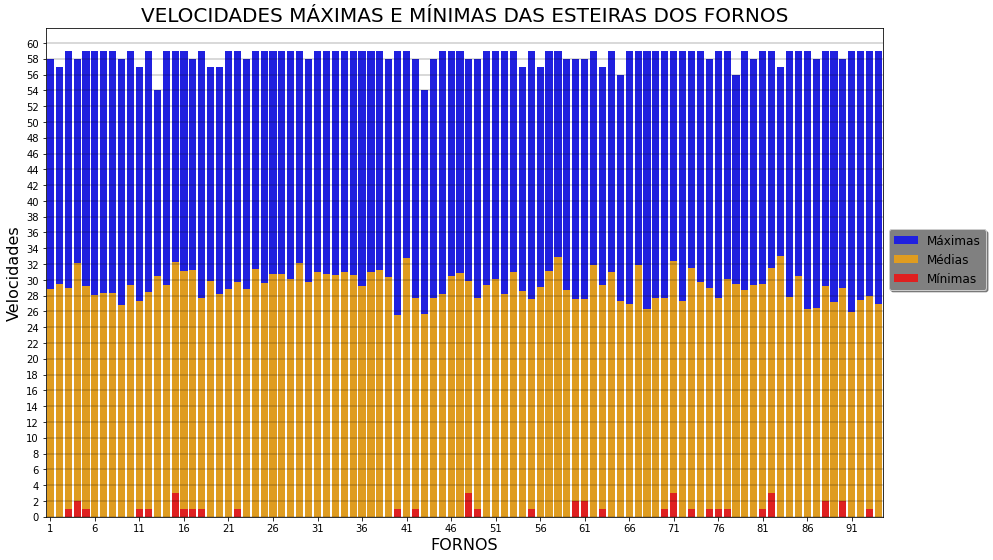

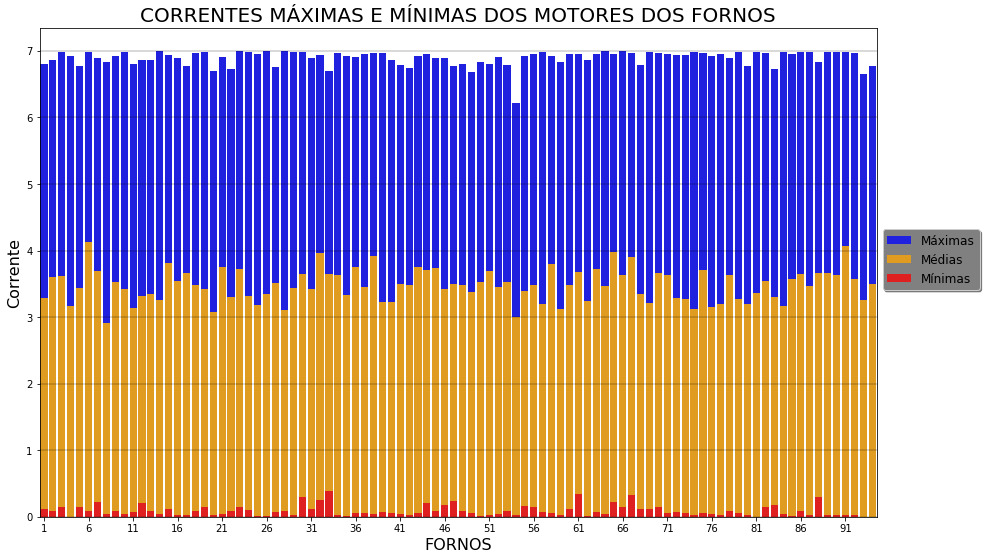

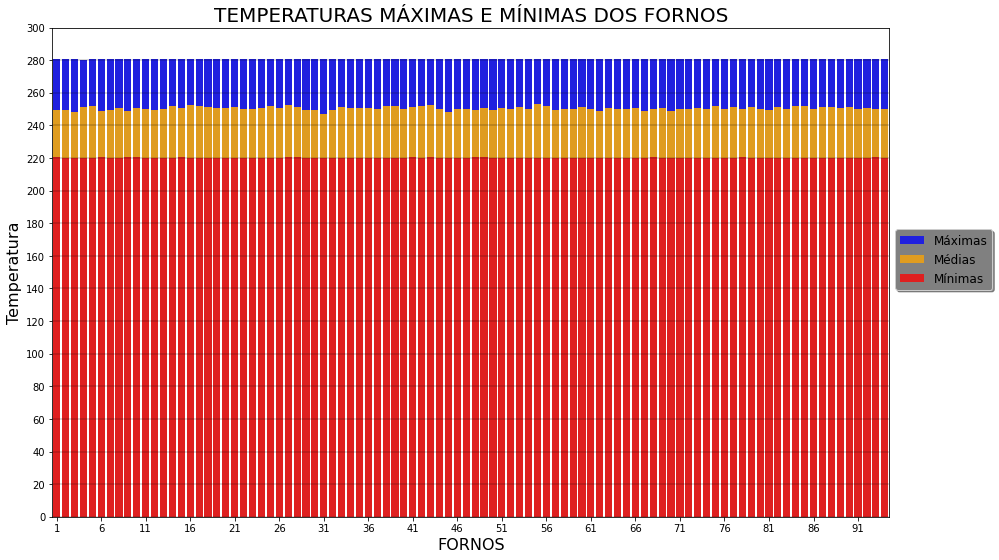

In [4]:
#----------------------------------------------------------------------
# ROTINA PRINCIPAL
#----------------------------------------------------------------------
json_pd = Carrega_Fornos()

# Cria uma lista contendo todos os detalhes de todas as esteiras e a salva em um

detalhes_pd = Obtem_Detalhes()

estat_velocidade_pd = Estatistica_Velocidade_fornos() # ZERO ou VAZIO para exibir todas as esteiras

estat_motor_pd = Estatistica_Corrente_Motor() # ZERO ou VAZIO para exibir todas as esteiras

estat_temp_pd = Estatistica_Temperaturas() # ZERO ou VAZIO para exibir todas as esteiras

#Exibir_Estatisticas()

Graficos_Barras('VELOCIDADES MÁXIMAS E MÍNIMAS DAS ESTEIRAS DOS FORNOS','Velocidades',2,estat_velocidade_pd)
Graficos_Barras('CORRENTES MÁXIMAS E MÍNIMAS DOS MOTORES DOS FORNOS','Corrente',1,estat_motor_pd)
Graficos_Barras('TEMPERATURAS MÁXIMAS E MÍNIMAS DOS FORNOS','Temperatura',20,estat_temp_pd)